In [2]:
import pandas as pd
archivo_arsl = r'class\dynamic\arousal.csv'
archivo_val = r'class\dynamic\valence.csv'
df_arsl = pd.DataFrame(pd.read_csv(archivo_arsl))
df_val = pd.DataFrame(pd.read_csv(archivo_val))
df_arsl

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_40000ms,sample_40500ms,sample_41000ms,sample_41500ms,sample_42000ms,sample_42500ms,sample_43000ms,sample_43500ms,sample_44000ms,sample_44500ms
0,2,-0.109386,-0.114942,-1.164126e-01,-0.118613,-1.264569e-01,-0.133199,-0.136855,-0.144713,-0.138985,...,-0.256900,-0.259548,-0.262236,-0.261480,-0.264915,-0.265395,-0.265161,-0.264469,-0.265841,-0.267091
1,3,-0.110846,-0.123973,-1.311026e-01,-0.135956,-1.407755e-01,-0.144664,-0.163118,-0.165218,-0.158858,...,-0.265677,-0.265931,-0.263960,-0.263572,-0.262956,-0.260338,-0.248711,-0.245517,-0.251300,-0.254620
2,4,0.222327,0.179446,1.783881e-01,0.184056,1.760421e-01,0.178720,0.176345,0.175793,0.176154,...,0.309623,0.298644,0.294143,0.302702,0.297487,0.303423,0.298097,0.304339,0.304114,0.305078
3,5,-0.255613,-0.251579,-2.519577e-01,-0.251124,-2.507627e-01,-0.251957,-0.251957,-0.251957,-0.251957,...,-0.222827,-0.225900,-0.228914,-0.228914,-0.228914,-0.228914,-0.227562,-0.227609,-0.229997,-0.243921
4,7,0.464234,0.460789,4.609907e-01,0.461046,4.572397e-01,0.465702,0.471809,0.469918,0.473377,...,0.331689,0.333163,0.331243,0.333925,0.333738,0.340781,0.339002,0.339272,0.340961,0.342020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2054,-0.190000,-0.182000,-1.800000e-01,-0.158000,-1.560000e-01,-0.150000,-0.152000,-0.150000,-0.150000,...,-0.148000,-0.150000,-0.164000,-0.154000,-0.154000,-0.156000,-0.154000,-0.176000,-0.178000,-0.170000
1798,2055,-0.070000,-0.086000,-1.100000e-01,-0.072000,-6.200000e-02,-0.062000,-0.076000,-0.062000,-0.042000,...,0.108000,0.104000,0.096000,0.110000,0.106000,0.090000,0.110000,0.116000,0.116000,0.114000
1799,2056,-0.044000,-0.044000,-4.400000e-02,-0.044000,-4.200000e-02,-0.046000,-0.050000,-0.052000,-0.052000,...,-0.034000,-0.032000,-0.030000,-0.028000,-0.026000,-0.026000,-0.026000,-0.022000,-0.024000,-0.026000
1800,2057,0.413333,0.413333,4.116667e-01,0.410000,4.066667e-01,0.410000,0.401667,0.371667,0.340000,...,0.411667,0.436667,0.438333,0.406667,0.363333,0.343333,0.335000,0.326667,0.325000,0.321667


In [3]:
mean_df_arsl = df_arsl.iloc[:, 1:].mean(axis = 1)
mean_df_val = df_val.iloc[:, 1:].mean(axis = 1)
MEAN_df = pd.DataFrame()
MEAN_df['song_id'] = df_arsl['song_id']
MEAN_df['mean_arsl'] = mean_df_arsl
MEAN_df['mean_val'] = mean_df_val

In [4]:
def asignar_emotion(arousal, valence):
    if arousal < 0 and valence < 0:
        return 'Sad'
    elif arousal >= 0 and valence >= 0:
        return 'Happy'
    elif arousal < 0 and valence >= 0:
        return 'Tender'
    elif arousal >= 0 and valence < 0:
        return 'Angry'

In [5]:
MEAN_df['Emotion'] = MEAN_df.apply(lambda row: asignar_emotion(row['mean_arsl'], row['mean_val']), axis=1)

MEAN_df

,song_id,mean_arsl,mean_val,Emotion
0,2,-0.197517,-0.215511,Sad
1,3,-0.193187,-0.265855,Sad
2,4,0.243072,0.155210,Happy
3,5,-0.236207,0.140160,Tender
4,7,0.376292,0.332455,Happy
...,...,...,...,...
1797,2054,-0.164700,0.092400,Tender
1798,2055,0.006267,0.048800,Happy
1799,2056,-0.046433,0.162600,Tender
1800,2057,0.348889,-0.167500,Angry


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

color_map = {'Sad': 'blue', 'Angry': 'red', 'Tender': 'green', 'Happy': 'orange'}

hover_data = {
    'song_id': True,
    'mean_arsl': False,
    'mean_val': False,
    'Emotion': True
}

# Plotly scatter plot
fig = px.scatter(MEAN_df, x='mean_arsl', y='mean_val', color='Emotion', color_discrete_map=color_map,
                 hover_data=hover_data, title='Emotion Map', labels={'mean_arsl': 'Mean ARSL', 'mean_val': 'Mean VAL'})

# Customize hover label
fig.update_traces(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Show the plot
fig.show()

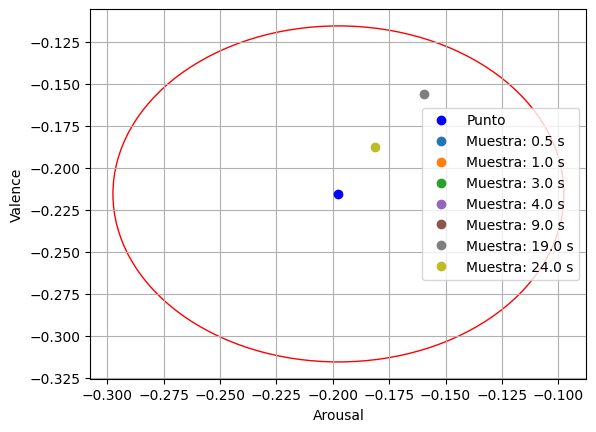

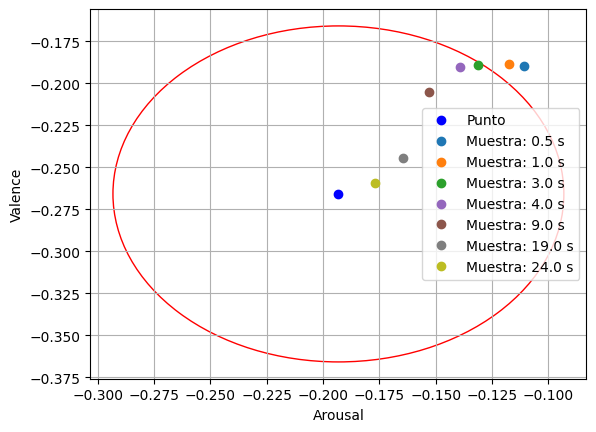

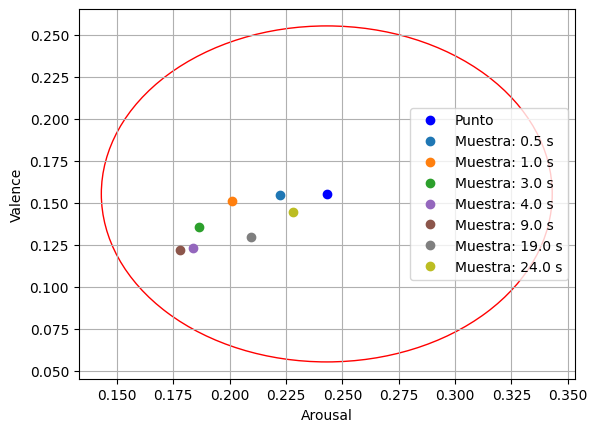

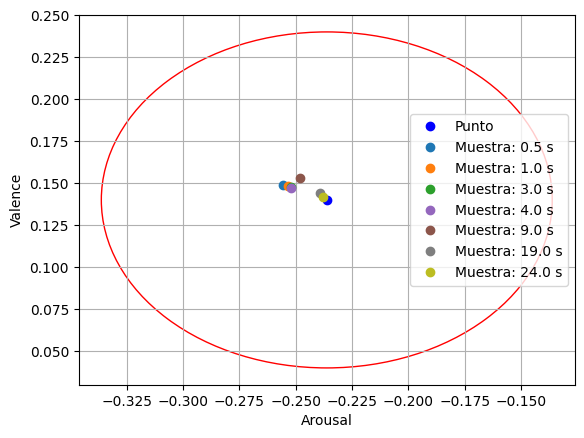

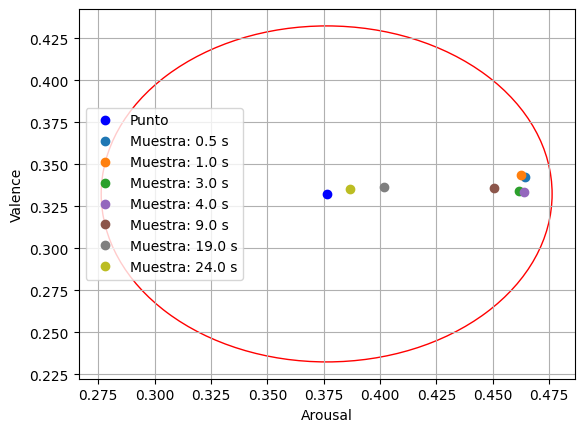

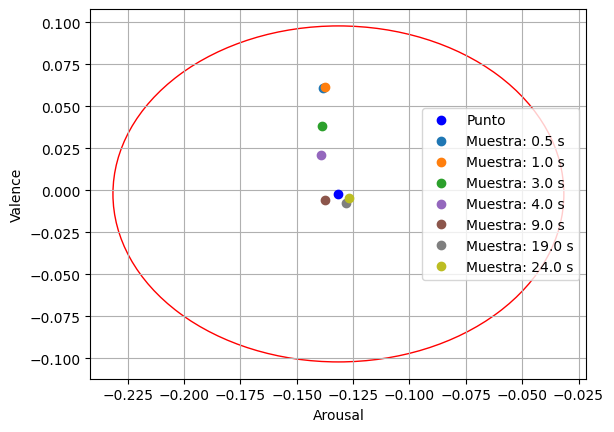

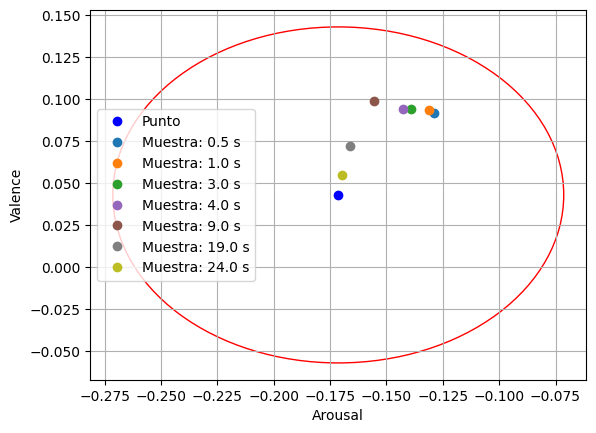

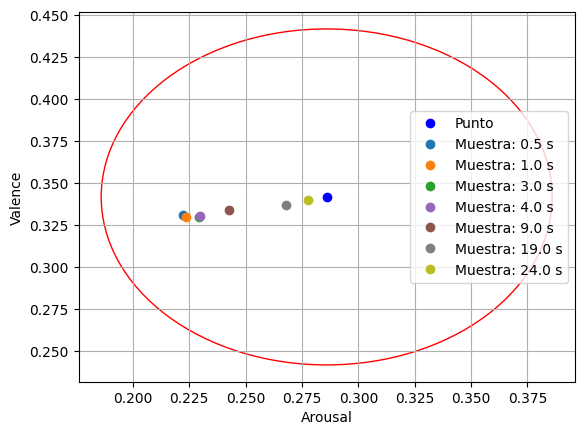

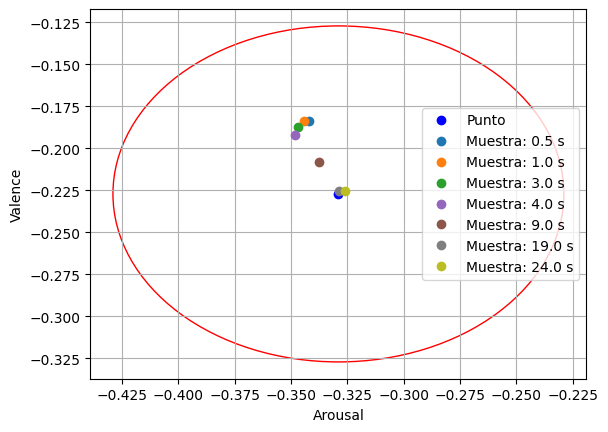

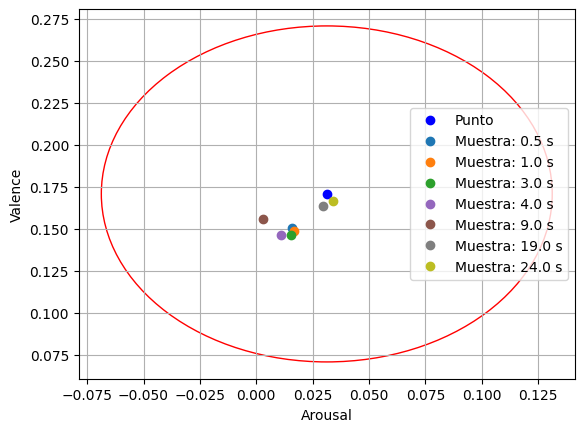

In [73]:
import matplotlib.pyplot as plt

def graficar_punto_con_epsilon(x, y, epsilon, n):
    # Crear una figura y un eje
    fig, ax = plt.subplots()
    circle = plt.Circle((x, y), epsilon, color='r', fill=False)
    ax.add_artist(circle)
    ax.set_xlim(x - 1.1 * epsilon, x + 1.1 * epsilon)
    ax.set_ylim(y - 1.1 * epsilon, y + 1.1 * epsilon)
    # Dibujar el punto
    ax.plot(x, y, 'bo', label='Punto')
    
    for i, t in enumerate([2,3,7,9,19, 39, 49]):
        color = plt.cm.tab10(i / 7)

        mean_n_arsl = df_arsl.iloc[:, 1:t].mean(axis = 1)[n]
        mean_n_val = df_val.iloc[:, 1:t].mean(axis = 1)[n]
        ax.plot(mean_n_arsl, mean_n_val, 'o', label = f'Muestra: {(t-1)/2} s', color = color)

    # Dibujar el círculo con radio epsilon

    # Etiquetas y leyenda
    ax.set_xlabel('Arousal')
    ax.set_ylabel('Valence')
    ax.legend()
    

    # Mostrar la gráfica
    plt.grid(True)
    
    plt.show()


for n in range(10):
    # Coordenadas del punto
    x = MEAN_df['mean_arsl'][n]
    y = MEAN_df['mean_val'][n]

    # Epsilon
    epsilon = 0.1

    # Graficar el punto con epsilon
    graficar_punto_con_epsilon(x, y, epsilon, n)


In [72]:
df_arsl.iloc[:, 1:7]

,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms
0,-0.109386,-0.114942,-1.164126e-01,-0.118613,-1.264569e-01,-0.133199
1,-0.110846,-0.123973,-1.311026e-01,-0.135956,-1.407755e-01,-0.144664
2,0.222327,0.179446,1.783881e-01,0.184056,1.760421e-01,0.178720
3,-0.255613,-0.251579,-2.519577e-01,-0.251124,-2.507627e-01,-0.251957
4,0.464234,0.460789,4.609907e-01,0.461046,4.572397e-01,0.465702
...,...,...,...,...,...,...
1797,-0.190000,-0.182000,-1.800000e-01,-0.158000,-1.560000e-01,-0.150000
1798,-0.070000,-0.086000,-1.100000e-01,-0.072000,-6.200000e-02,-0.062000
1799,-0.044000,-0.044000,-4.400000e-02,-0.044000,-4.200000e-02,-0.046000
1800,0.413333,0.413333,4.116667e-01,0.410000,4.066667e-01,0.410000


In [22]:
grupos = MEAN_df.groupby('Emotion')
dataframes_separados = {}
for nombre_grupo, grupo in grupos:
    dataframes_separados[nombre_grupo] = grupo

# Mostrar los DataFrames separados
# for key in dataframes_separados.keys():
    # dataframes_separados[key].to_csv(str(key) + '.csv', index=False)

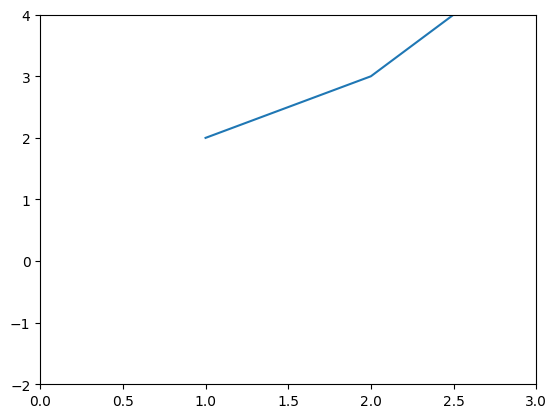

In [51]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Graficar los datos
plt.plot(x, y)

# Forzar los límites de los ejes x e y
plt.xlim(0, 3)  # Límites del eje x de 0 a 6
plt.ylim(-2, 4) # Límites del eje y de 0 a 12

# Mostrar el gráfico
plt.show()
